In [1]:
#importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime
import plotly
import cufflinks as cf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [3]:
def get_cotacao(ticker='^BVSP', source='yahoo', b_date='01/01/2017', e_date=datetime.datetime.strptime(str(datetime.date.today()), "%Y-%m-%d").strftime("%m-%d-%Y")):
    import pandas as pd
    from pandas_datareader import data as get
    return get.DataReader(ticker, data_source=source, start=b_date, end=e_date)

In [4]:
df=get_cotacao('PETR4.SA')

df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [29]:
df=df[['Adj Close']]
df

,Adj Close
Date,
2017-01-02,12.417701
2017-01-03,13.129221
2017-01-04,13.129221
2017-01-05,13.340982
2017-01-06,13.264747
...,...
2021-09-02,26.600000
2021-09-03,26.330000
2021-09-06,26.459999


from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
train_norm = mms.fit_transform(train)
test_norm = mms.transform(test)

In [6]:
#separacao em treinamento e teste
#verificar quantidade de linhas

qtd_linhas=df.shape[0]
qtd_linhas_tr=round(df.shape[0]*.70)
qtd_linhas_tst=qtd_linhas-qtd_linhas_tr
print(' las lineas totales son:{}\n las lineas de treino son:{}\n las lineas de test son:{}'.format(qtd_linhas,qtd_linhas_tr,qtd_linhas_tst))


 las lineas totales son:1163
 las lineas de treino son:814
 las lineas de test son:349


In [7]:
#normalizacao dos dados
#esto es debido a que no queremos que ningun valor tenga mayor repercusion por lo cual iran todos de 0 a 1
scaler=StandardScaler()
norm_df=scaler.fit_transform(df)
norm_df.shape


(1163, 1)

In [8]:
#separar treino do teste
test=norm_df[qtd_linhas_tr:qtd_linhas_tst+qtd_linhas_tr]
train=norm_df[:qtd_linhas_tr]

print(len(train), len(test))


814 349


In [9]:
#converter um array de valores em uma matriz
def create_df(df,steps=1):
    dataX, dataY=[],[]
    for i in range(len(df)-steps-1):
        a=df[i:(i+steps),0]
        
        dataX.append(a)
        dataY.append(df[i+steps,0])
    return np.array(dataX), np.array(dataY)

In [10]:
#gerando dados de treino e teste
steps=15
x_train, y_train= create_df(train ,steps)
x_test, y_test= create_df(test,steps)


In [11]:
x_train.shape


(798, 15)

In [12]:
#gerando os dados que o modelo espera
x_train=x_train.reshape(x_train.shape[0], x_train.shape[1],1)

x_test=x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [13]:
#montando a rede
model=Sequential()
model.add(LSTM(35, return_sequences=True,input_shape=(steps,1)))
model.add(LSTM(35, return_sequences=True))
model.add(LSTM(35))
model.add(Dropout(0.2))
model.add(Dense(1))





In [14]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 35)            5180      
_________________________________________________________________
lstm_1 (LSTM)                (None, 15, 35)            9940      
_________________________________________________________________
lstm_2 (LSTM)                (None, 35)                9940      
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 36        
Total params: 25,096
Trainable params: 25,096
Non-trainable params: 0
_________________________________________________________________


In [15]:
#treinamento modelo
validation=model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=100, batch_size=15, verbose=2)

Epoch 1/100
54/54 - 8s - loss: 0.2687 - val_loss: 0.0872
Epoch 2/100
54/54 - 1s - loss: 0.1132 - val_loss: 0.0581
Epoch 3/100
54/54 - 1s - loss: 0.0889 - val_loss: 0.0547
Epoch 4/100
54/54 - 1s - loss: 0.0706 - val_loss: 0.0392
Epoch 5/100
54/54 - 1s - loss: 0.0527 - val_loss: 0.0595
Epoch 6/100
54/54 - 1s - loss: 0.0553 - val_loss: 0.0397
Epoch 7/100
54/54 - 1s - loss: 0.0502 - val_loss: 0.0441
Epoch 8/100
54/54 - 1s - loss: 0.0515 - val_loss: 0.0328
Epoch 9/100
54/54 - 1s - loss: 0.0444 - val_loss: 0.0308
Epoch 10/100
54/54 - 1s - loss: 0.0408 - val_loss: 0.0302
Epoch 11/100
54/54 - 1s - loss: 0.0426 - val_loss: 0.0328
Epoch 12/100
54/54 - 1s - loss: 0.0405 - val_loss: 0.0280
Epoch 13/100
54/54 - 1s - loss: 0.0403 - val_loss: 0.0287
Epoch 14/100
54/54 - 1s - loss: 0.0364 - val_loss: 0.0256
Epoch 15/100
54/54 - 1s - loss: 0.0358 - val_loss: 0.0354
Epoch 16/100
54/54 - 1s - loss: 0.0341 - val_loss: 0.0231
Epoch 17/100
54/54 - 1s - loss: 0.0354 - val_loss: 0.0247
Epoch 18/100
54/54 - 1s

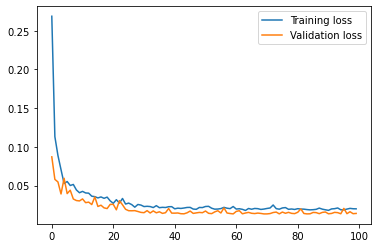

In [16]:

plt.plot(validation.history['loss'], label='Training loss')
plt.plot(validation.history['val_loss'], label='Validation loss')
plt.legend()

In [17]:
val=pd.DataFrame(validation.history)
val

,loss,val_loss
0,0.268696,0.087160
1,0.113227,0.058080
2,0.088921,0.054748
3,0.070616,0.039223
4,0.052704,0.059503
...,...,...
95,0.018749,0.020640
96,0.019697,0.013791
97,0.020622,0.016298
98,0.020137,0.013770


In [18]:
import plotly.express as px

fig = px.line(val, x=val.index,y=val.columns)
fig.show()

In [19]:
#fazendo a previsao
prev=model.predict(x_test)
prev=scaler.inverse_transform(prev)


In [20]:
#previsao para os proximos 10 dias
lenght_test= len(test)
lenght_test

349

In [21]:
#pegar os ultimos dias que sao o tamanho do meu step
days_input_steps=lenght_test-steps


In [22]:
#trasnformar en array
input_steps=test[days_input_steps:]
input_steps=np.array(input_steps).reshape(1,-1)
input_steps

array([[1.34923213, 1.34161982, 1.42155111, 1.52812603, 1.55667284,
        1.51099787, 1.70131043, 1.66515094, 1.45390425, 1.42535744,
        1.34161982, 1.29023534, 1.31497582, 1.03141016, 1.13227594]])

In [23]:
#transformar en lista
list_output_steps=list(input_steps)
list_output_steps=list_output_steps[0].tolist()


In [24]:
#loop para prever os proximos 10 dias
pred_output=[]
i=1
n_future=10
while(i<=n_future):
    if len(list_output_steps) >  steps:
        input_steps = np.array(list_output_steps[1:])
        print('{} dia. valores de entrada -> {}'.format(i, input_steps))
        input_steps = input_steps.reshape(1,-1)
        input_steps = input_steps.reshape((1,steps,1))
        print(input_steps)
        pred = model.predict(input_steps, verbose=0)
        print('{} dia. valor previsto -> {}'.format(i, pred))
        list_output_steps.extend(pred[0].tolist())
        list_output_steps = list_output_steps[1:]
        print(list_output_steps)
        pred_output.extend(pred.tolist())
        i=i+1
    else:
        input_steps = input_steps.reshape((1, steps,1))
        pred= model.predict(input_steps, verbose=0)
        print(pred[0])
        list_output_steps.extend(pred[0].tolist())
        print(len(list_output_steps))
        pred_output.extend(pred.tolist())
        i=i+1
print(pred_output)
        

[1.1398135]
16
2 dia. valores de entrada -> [1.34161982 1.42155111 1.52812603 1.55667284 1.51099787 1.70131043
 1.66515094 1.45390425 1.42535744 1.34161982 1.29023534 1.31497582
 1.03141016 1.13227594 1.13981354]
[[[1.34161982]
  [1.42155111]
  [1.52812603]
  [1.55667284]
  [1.51099787]
  [1.70131043]
  [1.66515094]
  [1.45390425]
  [1.42535744]
  [1.34161982]
  [1.29023534]
  [1.31497582]
  [1.03141016]
  [1.13227594]
  [1.13981354]]]
2 dia. valor previsto -> [[1.1144702]]
[1.3416198193089377, 1.4215511054183843, 1.5281260325668515, 1.556672842679, 1.5109978739010854, 1.7013104253052551, 1.6651509389005952, 1.4539042536767885, 1.4253574435646401, 1.3416198193089377, 1.2902353433116396, 1.3149758152775324, 1.0314101572444057, 1.1322759401658742, 1.1398135423660278, 1.1144702434539795]
3 dia. valores de entrada -> [1.42155111 1.52812603 1.55667284 1.51099787 1.70131043 1.66515094
 1.45390425 1.42535744 1.34161982 1.29023534 1.31497582 1.03141016
 1.13227594 1.13981354 1.11447024]
[[[1.4

In [25]:
prev = scaler.inverse_transform(pred_output)
prev= np.array(prev).reshape(1,-1)
list_output_prev=list(prev)
list_output_prev=prev[0].tolist()
list_output_prev

[25.539606437644494,
 25.406439714141186,
 25.253712806838454,
 25.104786188872232,
 24.96585106838526,
 24.835358390568047,
 24.711217275940577,
 24.59264599364873,
 24.478251459221696,
 24.366523453837928]

In [26]:
datelist = pd.date_range(datetime.date.today(), periods=10).tolist()
datelist

[Timestamp('2021-09-09 00:00:00', freq='D'),
 Timestamp('2021-09-10 00:00:00', freq='D'),
 Timestamp('2021-09-11 00:00:00', freq='D'),
 Timestamp('2021-09-12 00:00:00', freq='D'),
 Timestamp('2021-09-13 00:00:00', freq='D'),
 Timestamp('2021-09-14 00:00:00', freq='D'),
 Timestamp('2021-09-15 00:00:00', freq='D'),
 Timestamp('2021-09-16 00:00:00', freq='D'),
 Timestamp('2021-09-17 00:00:00', freq='D'),
 Timestamp('2021-09-18 00:00:00', freq='D')]

In [32]:
df_prev=pd.DataFrame(datelist)
df_prev['Date']=pd.DataFrame(datelist)
df_prev.drop([0], axis=1, inplace=True)

df_prev['Prev']=list_output_prev
df_prev.set_index('Date', inplace=True)

In [33]:
df_prev

,Prev
Date,
2021-09-09,25.539606
2021-09-10,25.406440
2021-09-11,25.253713
2021-09-12,25.104786
2021-09-13,24.965851
2021-09-14,24.835358
2021-09-15,24.711217
2021-09-16,24.592646
2021-09-17,24.478251


In [34]:
df

,Adj Close
Date,
2017-01-02,12.417701
2017-01-03,13.129221
2017-01-04,13.129221
2017-01-05,13.340982
2017-01-06,13.264747
...,...
2021-09-02,26.600000
2021-09-03,26.330000
2021-09-06,26.459999


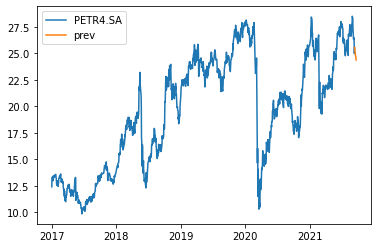

In [37]:

plt.plot(df, label='PETR4.SA')
plt.plot(df_prev, label='prev')
plt.legend()

# como hacer para tener el grafico de arriba en plotly
import plotly.graph_objects as go


# dic para dfs
dfs = {"df1" : df, "df2": df_prev}

# grafico
fig = go.Figure()

for i in dfs:
    fig = fig.add_trace(go.Scatter(x = dfs[i],
                                   y = dfs[i], 
                                   name = i))
fig.show()